## Bivariate Data

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Import Data

In [25]:
automobile_data = pd.read_csv('datasets/auto-mpg.csv')

automobile_data.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [26]:
automobile_data.shape

(398, 9)

In [27]:
automobile_data = automobile_data.replace('?', np.nan)

automobile_data = automobile_data.dropna()

In [28]:
automobile_data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [29]:
automobile_data.shape

(392, 9)

In [30]:
automobile_data.drop(['origin', 'car name'], axis=1, inplace=True)

automobile_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70
3,16.0,8,304.0,150,3433,12.0,70
4,17.0,8,302.0,140,3449,10.5,70


In [31]:
automobile_data['model year'] = '19' + automobile_data['model year'].astype(str)

automobile_data.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
247,39.4,4,85.0,70,2070,18.6,1978
113,21.0,6,155.0,107,2472,14.0,1973
272,23.8,4,151.0,85,2855,17.6,1978
189,15.5,8,304.0,120,3962,13.9,1976
391,36.0,4,135.0,84,2370,13.0,1982


In [32]:
import datetime

automobile_data['age'] = datetime.datetime.now().year - \
    pd.to_numeric(automobile_data['model year'])

In [33]:
automobile_data.drop(['model year'], axis=1, inplace=True)

automobile_data.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
92,13.0,8,351.0,158,4363,13.0,47
34,16.0,6,225.0,105,3439,15.5,49
157,15.0,8,350.0,145,4440,14.0,45
391,36.0,4,135.0,84,2370,13.0,38
88,14.0,8,302.0,137,4042,14.5,47


In [34]:
automobile_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
age               int64
dtype: object

In [35]:
automobile_data['horsepower'] = pd.to_numeric(automobile_data['horsepower'], errors='coerce')

automobile_data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,44.020408
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,38.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,41.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,44.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,47.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,50.000000


In [36]:
automobile_data.to_csv('datasets/automobile_data_processed.csv', index=False)

In [13]:
!ls datasets/

500_Person_Gender_Height_Weight_Index.csv
HousingData.csv
Mall_Customers.json
Salary_Data.csv
Salary_Data_old.csv
USDAProj_Corn_2007to2018.csv
auto-mpg.csv
automobile_data_processed.csv
house_data_processed.csv
mall_data_column_oriented.json
mall_data_index_oriented.json
mall_data_processed.csv
mall_data_records_oriented.json
mall_data_values_oriented.json
sp500_1987.csv
weight-height.csv


### Bivariate data analysis

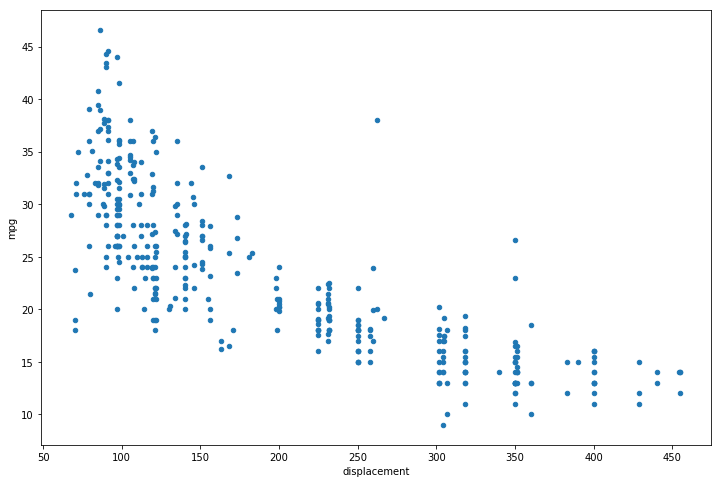

In [37]:
automobile_data.plot.scatter(x='displacement', y='mpg', figsize=(12, 8))

plt.show()

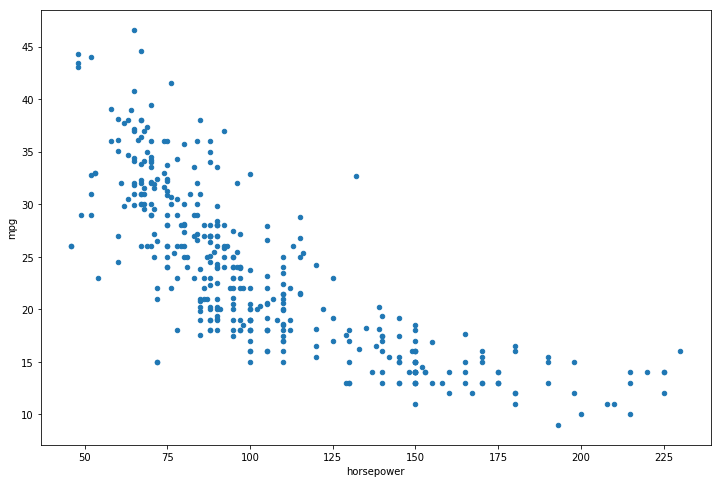

In [38]:
automobile_data.plot.scatter(x='horsepower', y='mpg', figsize=(12, 8))

plt.show()

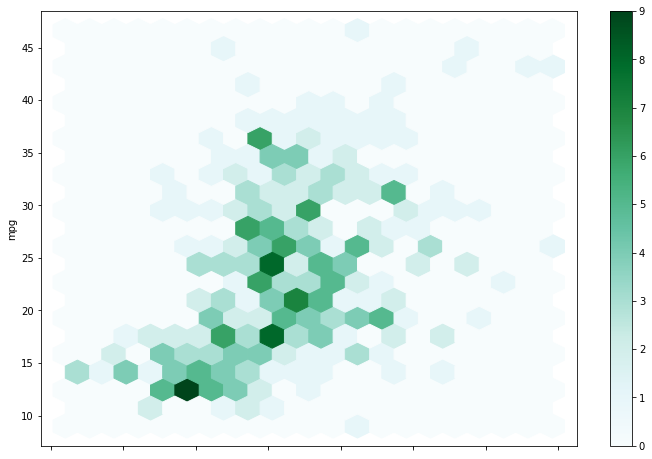

In [39]:
automobile_data.plot.hexbin(x='acceleration', y='mpg', gridsize=20, figsize=(12, 8))

plt.show()

In [40]:
automobile_grouped = automobile_data.groupby(['cylinders']).mean()[['mpg', 'horsepower', 
                                                                    'acceleration', 'displacement']]

automobile_grouped

,mpg,horsepower,acceleration,displacement
cylinders,,,,
3,20.550000,99.250000,13.250000,72.500000
4,29.283920,78.281407,16.581910,109.670854
5,27.366667,82.333333,18.633333,145.000000
6,19.973494,101.506024,16.254217,218.361446
8,14.963107,158.300971,12.955340,345.009709


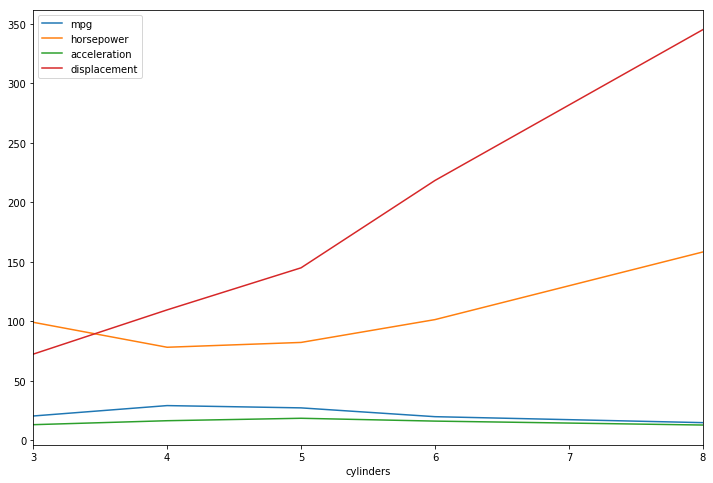

In [41]:
automobile_grouped.plot.line(figsize=(12, 8))

plt.show()

### Multivariate data analysis

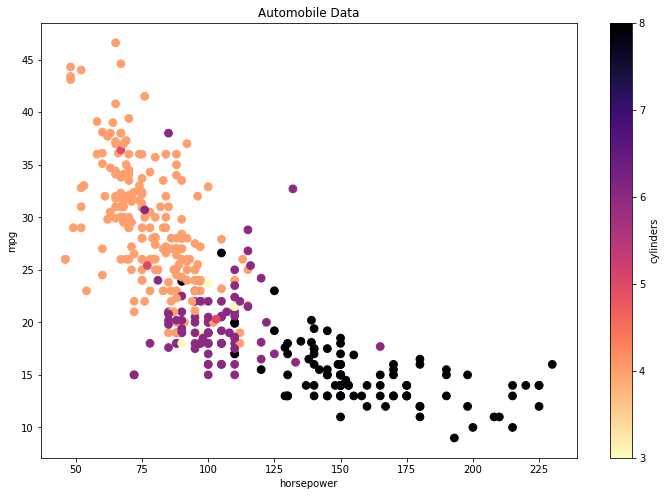

In [42]:
fig, ax = plt.subplots()

automobile_data.plot(x='horsepower', y='mpg', 
                     kind='scatter', s=60, c='cylinders', 
                     cmap='magma_r', title='Automobile Data', 
                     figsize=(12, 8), ax=ax)

plt.show()

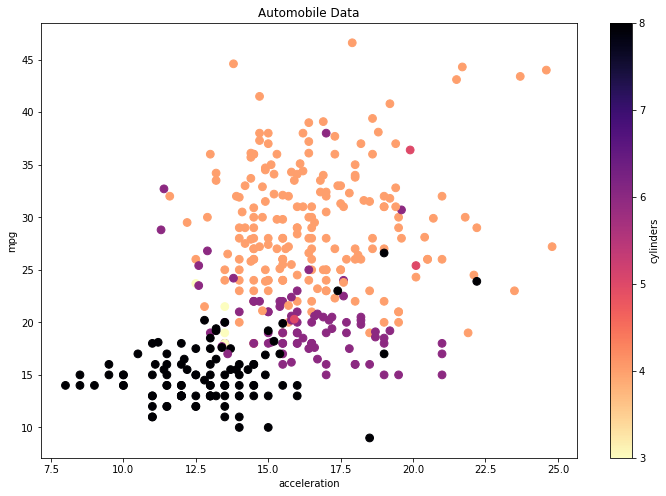

In [43]:
fig, ax = plt.subplots()

automobile_data.plot(x='acceleration', y='mpg', 
                     kind='scatter', s=60, c='cylinders', 
                     cmap='magma_r', title='Automobile Data', 
                     figsize=(12, 8), ax=ax)

plt.show()

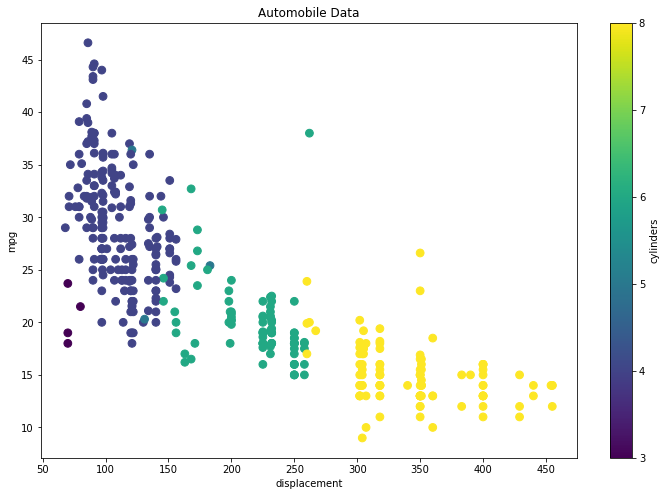

In [44]:
fig, ax = plt.subplots()

automobile_data.plot(x='displacement', y='mpg', 
                     kind='scatter', s=60, c='cylinders', 
                     cmap='viridis', title='Automobile Data', 
                     figsize=(12, 8), ax=ax)

plt.show()

In [45]:
automobile_data['acceleration'].cov(automobile_data['mpg'])

9.115514379664914

In [46]:
automobile_data['acceleration'].corr(automobile_data['mpg'])

0.4233285369027875

In [47]:
automobile_data['horsepower'].cov(automobile_data['mpg'])

-233.8579257790073

In [48]:
automobile_data['horsepower'].corr(automobile_data['mpg'])

-0.7784267838977759

In [49]:
automobile_data['horsepower'].cov(automobile_data['displacement'])

3614.0337439323557

In [50]:
automobile_data['horsepower'].corr(automobile_data['displacement'])

0.8972570018434687

### Covariance

In `probability theory` and `statistics`, `covariance` is a measure of the `joint variability` of two random variables. If the `greater values of one variable mainly correspond with the greater values of the other variable`, and the same holds for the lesser values, (i.e., the variables tend to show similar behavior), the `covariance is positive`. In the opposite case, when the `greater values` of one variable mainly correspond to the lesser values of the other, (i.e., the variables tend to show opposite behavior), the `covariance is negative`. The sign of the covariance therefore shows the tendency in the linear relationship between the variables. The magnitude of the covariance is not easy to interpret because it is not normalized and hence depends on the magnitudes of the variables. The normalized version of the covariance, the `correlation coefficient`, however, shows by its `magnitude` the strength of the `linear relation`.

A distinction must be made between 
* (1) the covariance of two random variables, which is a population parameter that can be seen as a property of the joint probability distribution, and 
* (2) the sample covariance, which in addition to serving as a descriptor of the sample, also serves as an estimated value of the population parameter.

In [51]:
automobile_data_cov = automobile_data.cov()

automobile_data_cov

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
mpg,60.918142,-10.352928,-657.585207,-233.857926,-5517.440704,9.115514,-16.691477
cylinders,-10.352928,2.909696,169.721949,55.348244,1300.424363,-2.375052,2.171930
displacement,-657.585207,169.721949,10950.367554,3614.033744,82929.100139,-156.994435,142.572133
horsepower,-233.857926,55.348244,3614.033744,1481.569393,28265.620231,-73.186967,59.036432
weight,-5517.440704,1300.424363,82929.100139,28265.620231,721484.709008,-976.815253,967.228457
acceleration,9.115514,-2.375052,-156.994435,-73.186967,-976.815253,7.611331,-2.950462
age,-16.691477,2.171930,142.572133,59.036432,967.228457,-2.950462,13.569915


### Correlation

In `statistics`, `correlation` or `dependence` is any statistical relationship, whether causal or not, between two `random variables` or `bivariate data`. In the broadest sense correlation is any statistical association, though it commonly refers to the degree to which a pair of variables are linearly related. 

`Correlation` is the measure of how two or more variables are related to one another. There are several correlation coefficients, the most common of these is the `Pearson correlation coefficient`, which is sensitive only to a `linear relationship` between two variables (which may be present even when one variable is a nonlinear function of the other). Other `correlation coefficients` – such as `Spearman's rank correlation` – have been developed to be more robust than `Pearson's`, that is, more sensitive to nonlinear relationships. Mutual information can also be applied to measure dependence between two variables.

The most familiar measure of dependence between two quantities is the Pearson product-moment correlation coefficient (PPMCC), or "Pearson's correlation coefficient", commonly called simply "the correlation coefficient". Mathematically, it is defined as the quality of least squares fitting to the original data. It is obtained by taking the ratio of the covariance of the two variables in question of our numerical dataset, normalized to the square root of their variances. Mathematically, one simply divides the covariance of the two variables by the product of their standard deviations.

`Correlation` is a `bivariate analysis` that measures the strength of association between two variables and the direction of the relationship.  In terms of the strength of relationship, the value of the `correlation coefficient` varies between `+1` and `-1`.  A value of `± 1` indicates a `perfect degree of association` between the two variables.  As the correlation coefficient value goes towards 0, the relationship between the two variables will be weaker.  The direction of the relationship is indicated by the sign of the coefficient; a `+ sign indicates a positive relationship` and a `– sign indicates a negative relationship`. Usually, in statistics, we measure four types of correlations: 
* Pearson correlation, 
* Kendall rank correlation, 
* Spearman correlation, and the 
* Point-Biserial correlation.



* **Pearson r correlation:** Pearson `r correlation` is the most widely used correlation statistic to measure the degree of the relationship between `linearly` related variables. For example, in the stock market, if we want to measure how two stocks are related to each other, `Pearson r correlation` is used to measure the degree of relationship between the two. The point-biserial correlation is conducted with the Pearson correlation formula except that one of the variables is dichotomous.

    * **Types of research questions a Pearson correlation can examine:**

        * Is there a statistically significant relationship between age, as measured in years, and height, measured in inches?

        * Is there a relationship between temperature, measured in degrees Fahrenheit, and ice cream sales, measured by income?

        * Is there a relationship between job satisfaction, as measured by the JSS, and income, measured in dollars?
                
    * **Assumptions:**
    For the Pearson r correlation, both variables should be normally distributed (normally distributed variables have a bell-shaped curve).  Other assumptions include linearity and homoscedasticity.  Linearity assumes a straight line relationship between each of the two variables and homoscedasticity assumes that data is equally distributed about the regression line.


* **Kendall rank correlation:** `Kendall rank correlation` is a non-parametric test that measures the strength of dependence between two variables.  If we consider two samples, `a` and `b`, where each sample size is `n`, we know that the total number of pairings with a `b` is `n(n-1)/2`.  The following formula is used to calculate the value of `Kendall rank correlation:`



* **Spearman rank correlation:** `Spearman rank correlation` is a non-parametric test that is used to measure the degree of association between two variables.  The `Spearman rank correlation` test does not carry any assumptions about the distribution of the data and is the appropriate correlation analysis when the variables are measured on a scale that is at least ordinal.

    * **Types of research questions a Spearman Correlation can examine:**
       
       * Is there a statistically significant relationship between participants’ level of education (high school, bachelor’s, or graduate degree) and their starting salary?

        * Is there a statistically significant relationship between horse’s finishing position a race and horse’s age?

    * **Assumptions**

        * The assumptions of the Spearman correlation are that data must be at least ordinal and the scores on one variable must be monotonically related to the other variable.
        
        

**Ordinal data:**  In an ordinal scale, the levels of a variable are ordered such that one level can be considered higher/lower than another.  However, the magnitude of the difference between levels is not necessarily known.  An example would be rank ordering levels of education.  A graduate degree is higher than a bachelor’s degree, and a bachelor’s degree is higher than a high school diploma.  However, we cannot quantify how much higher a graduate degree is compared to a bachelor’s degree.  We also cannot say that the difference in education between a graduate degree and a bachelor’s degree is the same as the difference between a bachelor’s degree and a high school diploma.

In [52]:
automobile_data_corr = automobile_data.corr()

automobile_data_corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,-0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,-0.290316
age,-0.580541,0.345647,0.369855,0.416361,0.309120,-0.290316,1.000000


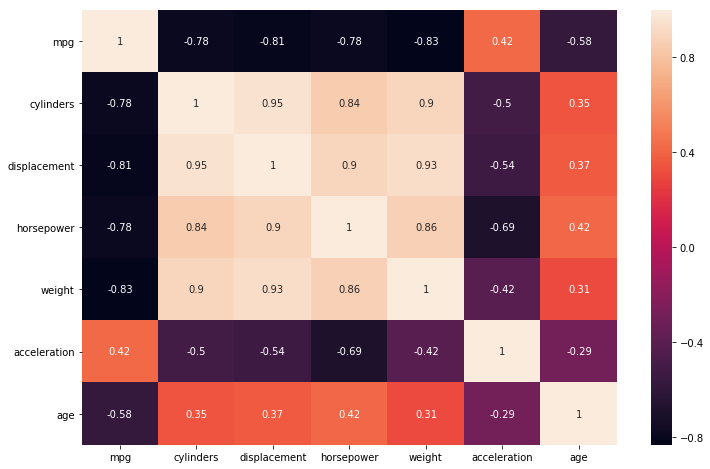

In [53]:
plt.figure(figsize=(12, 8))

sns.heatmap(automobile_data_corr, annot=True)

## Linear Regression

In [31]:
mpg_mean = automobile_data['mpg'].mean()

mpg_mean

23.44591836734694

In [32]:
horsepower_mean = automobile_data['horsepower'].mean()

horsepower_mean

104.46938775510205

#### Calculate the terms needed for the numerator and denominator of beta

In [33]:
automobile_data['horsepower_mpg_cov'] = (automobile_data['horsepower'] - horsepower_mean) * \
                                        (automobile_data['mpg'] - mpg_mean)

automobile_data['horsepower_var'] = (automobile_data['horsepower'] - horsepower_mean)**2

In [34]:
automobile_data['horsepower_mpg_cov']

0      -139.037630
1      -511.236610
2      -247.955998
3      -339.017222
4      -229.027426
          ...     
393     -65.641712
394   -1078.460079
395    -175.096814
396    -115.989671
397    -169.735589
Name: horsepower_mpg_cov, Length: 392, dtype: float64

In [35]:
automobile_data['horsepower_var']

0       651.812162
1      3663.955019
2      2073.036651
3      2073.036651
4      1262.424406
          ...     
393     341.118284
394    2753.036651
395     418.995835
396     648.689713
397     504.873386
Name: horsepower_var, Length: 392, dtype: float64

#### Calculate beta and alpha

In [36]:
beta = automobile_data['horsepower_mpg_cov'].sum() / automobile_data['horsepower_var'].sum()

print(f'beta = {beta}')

beta = -0.15784473335365362


In [37]:
alpha = mpg_mean - (beta * horsepower_mean)

print(f'alpha = {alpha}')

alpha = 39.93586102117047


In [38]:
y_pred = alpha + beta * automobile_data['horsepower']

print(y_pred)

0      19.416046
1      13.891480
2      16.259151
3      16.259151
4      17.837598
         ...    
393    26.361214
394    31.727935
395    26.676903
396    27.466127
397    26.992593
Name: horsepower, Length: 392, dtype: float64


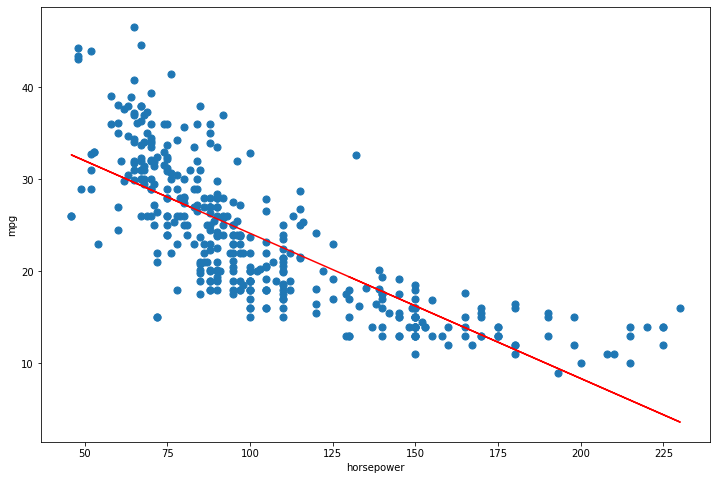

In [39]:
automobile_data.plot(x='horsepower', y='mpg', 
                     kind='scatter', s=50, figsize=(12, 8))

plt.plot(automobile_data['horsepower'], y_pred, color='red')

plt.show()